# **Projeto 1 - Ciência dos Dados**

Nicole Sarvasi Alves da Costa

## **Introdução**
Com o intuito de investigar a efetividade das organizações internacionais, será feita uma análise dos países antes e depois de ingressarem na CSTO, assim como uma análise comparatória dos países membros com países em circunstâncias semelhantes.

### **Pergunta a ser respondida**
Países que se juntam ao CSTO têm uma diminuição no número de assasinatos?

### **Explicação da hipótese e mecanismo**

#### HIPÓTESE
Após a ingressão no Tratado de Segurança Coletiva (CSTO), há uma diminuição no número de assasinatos dos países membros.

#### MECANISMO
O objetivo principal do CSTO, de acordo com o seu site oficial (https://odkb-csto.org), é prestação de segurança nacional e coletiva. Segundo o Ministério de Relações Exteriores da Armênia, algumas medidas tomadas pela organização foram: operações regionais anti-drogas, operações para combater a migração ilegal e o tráfico humano, operações para combater os crimes cibernéticos e as operações para previnir o possivel envolvimento dos cidadãos em atividades terroristas. Com isso, pretendo observar se as providências tomadas pelo CSTO impactaram no número de assasinatos nos países membros.



### **Bases de dados usadas**

Para os fins desse projeto, foram utilizados dados retirados do site: https://www.gapminder.org/data/. Tais quais o número de assasinatos por países.

        

links:
http://mfa.gov.by/en/organizations/membership/list/cddd96a3f70190b1.html Serviço Diplomatico da Belarussia
https://www.mfa.am/en/international-organisations/1 Ministerio de Foreign Affairs da Republica da Armenia
https://odkb-csto.org
http://www.odkb.gov.ru


In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import spearmanr
from scipy.stats import pearsonr
plt.style.use('ggplot')

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Tabela Países 

In [3]:
listabruta = pd.read_excel('murder_total_deaths.xlsx').set_index('country')

In [4]:
membros = ['Armenia','Belarus','Kazakhstan','Kyrgyz Republic','Russia','Tajikistan']
comparar = ['Turkmenistan','Uzbekistan','Latvia']
listabruta.loc[:,"Membro"] = "não"
listabruta.loc[membros,"Membro"] = "sim"



In [26]:
a=listabruta.iloc[:27,:]
a

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Membro
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2070.00,2200.00,2380.00,2600.00,2830.00,3020.00,3160.00,3270.00,3350.00,3450.00,...,4960.00,4990.00,4940.00,5020.00,5190.00,5560.00,5820.00,6060.00,6270.00,não
Albania,160.00,182.00,201.00,221.00,239.00,267.00,295.00,327.00,338.00,309.00,...,77.50,67.50,68.40,68.50,68.50,68.70,68.90,69.20,69.50,não
Algeria,377.00,382.00,391.00,400.00,410.00,421.00,432.00,452.00,468.00,467.00,...,441.00,445.00,447.00,451.00,457.00,465.00,474.00,472.00,471.00,não
Andorra,0.48,0.51,0.54,0.55,0.55,0.53,0.51,0.50,0.49,0.48,...,0.52,0.53,0.54,0.54,0.54,0.55,0.55,0.55,0.55,não
Angola,527.00,532.00,543.00,569.00,598.00,608.00,582.00,582.00,667.00,660.00,...,933.00,958.00,978.00,990.00,1010.00,1030.00,1050.00,1080.00,1090.00,não
Antigua and Barbuda,2.21,2.30,2.41,2.48,2.61,2.79,2.81,2.91,3.06,3.20,...,4.96,5.23,4.93,4.85,4.79,4.79,4.84,4.85,4.85,não
Argentina,1960.00,1980.00,2030.00,2070.00,2130.00,2140.00,2180.00,2190.00,2200.00,2270.00,...,2280.00,2330.00,2390.00,2460.00,2540.00,2630.00,2680.00,2650.00,2610.00,não
Armenia,165.00,186.00,201.00,220.00,215.00,205.00,195.00,175.00,164.00,154.00,...,135.00,132.00,128.00,126.00,124.00,118.00,114.00,114.00,115.00,sim
Australia,363.00,355.00,348.00,342.00,342.00,342.00,339.00,338.00,338.00,335.00,...,307.00,309.00,308.00,305.00,304.00,299.00,302.00,306.00,310.00,não


In [44]:
membros_antes = a.loc[membros, a.columns < 1994]
membros_depois = a.loc[membros, a.columns > 1994]
membros_antes

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
#listabruta['Membro']

In [9]:
listabruta.Membro.value_counts()

não    181
sim      6
Name: Membro, dtype: int64

# Tabela Assasinatos

In [31]:
assasinatos = pd.read_excel('murder_total_deaths.xlsx').set_index('country').T

In [37]:
assasinatos_membros = assasinatos.loc[:,membros].T
assasinatos_comparar = assasinatos.loc[:,comparar]
membros2 = ['Armenia','Belarus','Kazakhstan','Kyrgyz Republic','Tajikistan']
expandir = assasinatos.loc[:,membros2]


In [40]:
b = assasinatos_membros.loc[:,1900]
#assasinatos_membros
b

KeyError: 'the label [1900] is not in the [columns]'

Text(0.5, 0, 'anos')

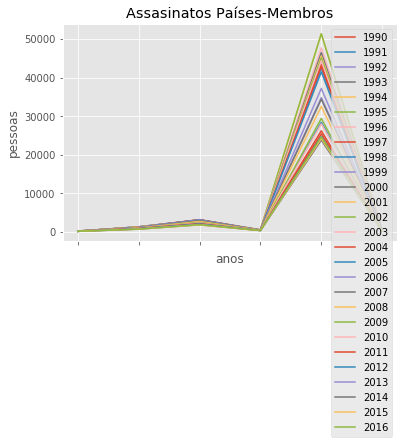

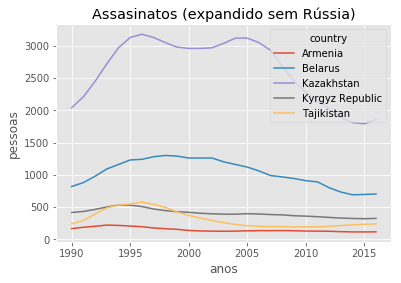

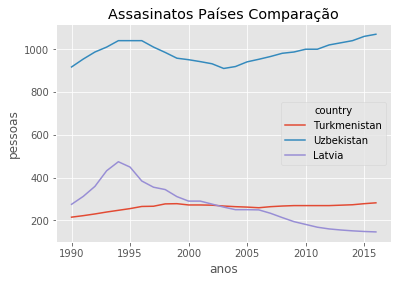

In [45]:
assasinatos_membros.plot()
plt.title('Assasinatos Países-Membros')
plt.ylabel('pessoas')
plt.xlabel('anos')
expandir.plot()
plt.title('Assasinatos (expandido sem Rússia)')
plt.ylabel('pessoas')
plt.xlabel('anos')
assasinatos_comparar.plot()
plt.title('Assasinatos Países Comparação')
plt.ylabel('pessoas')
plt.xlabel('anos')


In [ ]:
assasinatos.Russia.describe()

In [ ]:
membros_antes['Armenia'].plot.box()

In [ ]:
assasinatos_membros['Belarus'].plot.box()

In [ ]:
assasinato_comparação = assasinato.

# Tabela Porcentagem de Forças Armadas


Text(0, 0.5, 'Membros das Forças Armadas')

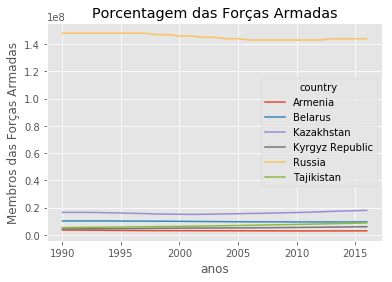

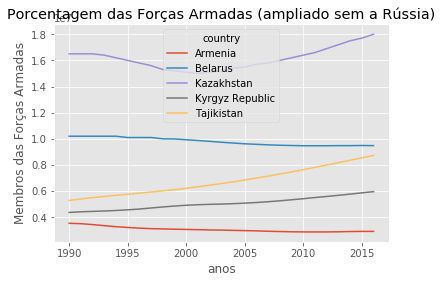

In [43]:
armedforces = pd.read_excel('armed_forces_personnel_percent_of_labor_force.xlsx')
armedforces.set_index('country', inplace=True)
forcasarmadas2= populacaobruto.loc[membros2,populacaobruto.columns >= 1990] 
forcas_armadas_membros2 = populacao.loc[membros2,populacao.columns < 2017].T
forcasarmadas= populacaobruto.loc[membros,populacaobruto.columns >= 1990] 
forcas_armadas_membros = populacao.loc[membros,populacao.columns < 2017].T
forcas_armadas_membros.plot()
plt.title('Porcentagem das Forças Armadas')
plt.xlabel('anos')
plt.ylabel('Membros das Forças Armadas')
forcas_armadas_membros2.plot()
plt.title('Porcentagem das Forças Armadas (ampliado sem a Rússia)')
plt.xlabel('anos')
plt.ylabel('Membros das Forças Armadas')


# Tabela População


In [20]:
populacaobruto = pd.read_excel('population_total.xlsx')
populacaobruto.set_index('country', inplace=True)
populacao = populacaobruto.loc[membros,populacaobruto.columns >= 1990] 
populacaomembros = populacao.loc[membros,populacao.columns < 2017]
populacaomembros

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Armenia,3540000,3510000,3440000,3360000,3280000,3220000,3170000,3130000,3110000,3090000,...,2930000,2910000,2890000,2880000,2880000,2880000,2890000,2910000,2920000,2920000
Belarus,10200000,10200000,10200000,10200000,10200000,10100000,10100000,10100000,10000000,9990000,...,9540000,9510000,9490000,9470000,9470000,9470000,9480000,9480000,9490000,9480000
Kazakhstan,16500000,16500000,16500000,16400000,16200000,16000000,15800000,15600000,15300000,15200000,...,15800000,16000000,16200000,16400000,16600000,16900000,17200000,17500000,17700000,18000000
Kyrgyz Republic,4370000,4420000,4450000,4480000,4520000,4570000,4630000,4710000,4790000,4860000,...,5190000,5260000,5340000,5420000,5510000,5590000,5680000,5770000,5870000,5960000
Russia,148000000,148000000,148000000,148000000,148000000,148000000,148000000,148000000,147000000,147000000,...,143000000,143000000,143000000,143000000,143000000,143000000,144000000,144000000,144000000,144000000
Tajikistan,5280000,5400000,5500000,5590000,5680000,5760000,5850000,5930000,6020000,6110000,...,7150000,7310000,7470000,7640000,7820000,8000000,8180000,8360000,8550000,8730000


In [21]:
populacaocomp = populacaobruto.loc[comparar,populacaobruto.columns >= 1990] 
populacaocomparar = populacaocomp.loc[comparar,populacao.columns < 2017].T
populacaocomparar

country,Turkmenistan,Uzbekistan,Latvia
1990,3680000,20500000,2660000
1991,3790000,21000000,2650000
1992,3900000,21400000,2620000
1993,4010000,21900000,2580000
1994,4120000,22400000,2540000
1995,4210000,22900000,2510000
1996,4290000,23300000,2480000
1997,4360000,23700000,2450000
1998,4410000,24100000,2430000
1999,4470000,24500000,2410000


In [ ]:
populacaocomparar.plot()

**Fontes:**

Serviço Diplomático da Bielorrúsia: (http://mfa.gov.by/en/organizations/membership/list/cddd96a3f70190b1.html)

Ministério de Relações Exteriores da República da Armênia:(https://www.mfa.am/en/international-organisations/1)

Site Oficial da Organização do Tratado de Segurança Coletiva: (https://odkb-csto.org) 

GapMinder: (https://www.gapminder.org)